# Titanic data investigation

## Importing data

In [31]:
import pandas as pd
import numpy as np


titanic_orginal_data = pd.read_csv('titanic_data.csv')

titanic_orginal_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create a small dataset to experiment

In [45]:
short_titanic = titanic_orginal_data.head(10).copy()
short_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [75]:
def normalize_gender(gender):
    ''' 1 = female
        -1 = male
        unknown = 0
    '''
    if gender == 'female':
        return 1
    elif gender == 'male':
        return -1
    else: return 0

def standardize(df):
    return (df - df.mean()) / df.std(ddof=0)


def correlation(x, y):
    return np.corrcoef(x, y)

def normalize_titanic(data):
    if data.name == 'Sex':
        result = data.apply(normalize_gender)
    else:
        result = data
    return result
    
short_titanic = short_titanic.apply(normalize_titanic)
short_titanic

titanic_data = titanic_orginal_data.apply(normalize_titanic)

titanic_data['Sex'].mean()
correlation(titanic_data['Sex'], titanic_data['Survived'])




0   -0.433703
1    0.701811
2   -0.149825
3    0.488902
4    0.488902
6    1.837325
7   -1.853096
8   -0.078855
9   -1.001460
Name: Age, dtype: float64

Chance to survive for Females and childs:

In [97]:
print "Females:"
print titanic_data[titanic_data['Sex'] > 0]['Survived'].mean()
print "Childs under 10 years:"
print titanic_data[titanic_data['Age'] < 10]['Survived'].mean()
print "Females in First class:"
print titanic_data[titanic_data['Sex'] > 0][titanic_data['Pclass'] == 1]['Survived'].mean()
print "Females in Second class:"
print titanic_data[titanic_data['Sex'] > 0][titanic_data['Pclass'] == 2]['Survived'].mean()
print "Females in Third class:"
print titanic_data[titanic_data['Sex'] > 0][titanic_data['Pclass'] == 3]['Survived'].mean()


Females:
0.742038216561
Childs under 10 years:
0.612903225806
Females in First class:
0.968085106383
Females in Second class:
0.921052631579
Females in Third class:
0.5


/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Male chance to survive:

In [100]:
print "Overall chances:"
print titanic_data[titanic_data['Sex'] < 0]['Survived'].mean()
print "Males in First class:"
print titanic_data[titanic_data['Sex'] < 0][titanic_data['Pclass'] == 1]['Survived'].mean()
print "Males in Second class:"
print titanic_data[titanic_data['Sex'] < 0][titanic_data['Pclass'] == 2]['Survived'].mean()
print "Males in Third class:"
print titanic_data[titanic_data['Sex'] < 0][titanic_data['Pclass'] == 3]['Survived'].mean()


Overall chances:
0.188908145581
Males in First class:
0.368852459016
Males in Second class:
0.157407407407
Males in Third class:
0.135446685879


/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/bertrand/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [102]:
std_ages = titanic_data[titanic_data['Age'] > 0]['Age']
std_survived = titanic_data[titanic_data['Age'] > 0]['Survived']
print correlation(std_survived, std_ages)

titanic_data['Age'].describe()


[[ 1.         -0.07722109]
 [-0.07722109  1.        ]]


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>


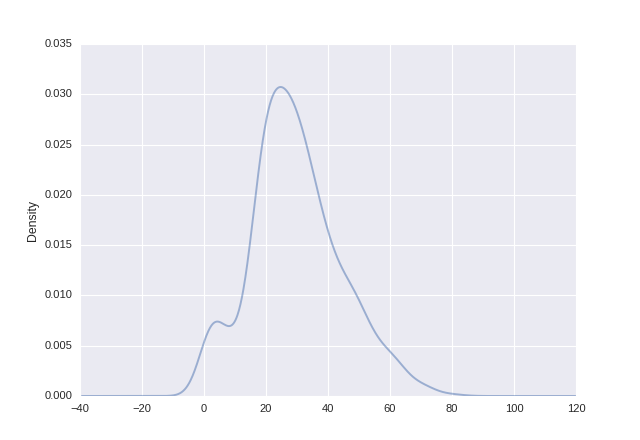

In [177]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib notebook

ages = titanic_data['Age']
ages.plot.kde(alpha=0.5)
